In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal, permutation
import pandas as pd
from pandas import DataFrame, Series



In [32]:
np.random.seed(20170516)

n0,mu0,variance0 = 20,[10,11],20
data0 = multivariate_normal(mu0,np.eye(2)*variance0,n0)
df0 = DataFrame(data0,columns=['x1','x2'])
df0['t'] = 0

n1,mu1,variance1 = 15,[18,20],22
data1 = multivariate_normal(mu1,np.eye(2)*variance1,n1)
df1 = DataFrame(data1,columns=['x1','x2'])
df1['t'] = 1

df = pd.concat([df0,df1],ignore_index=True)
train_set = df.reindex(permutation(df.index)).reset_index(drop=True)



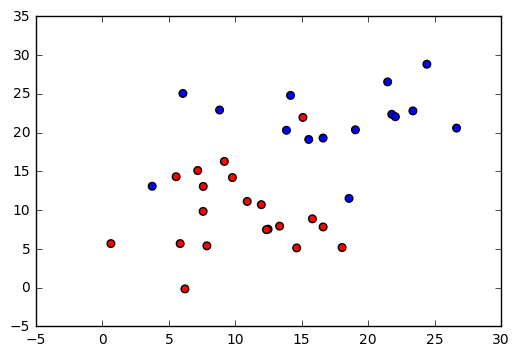

In [44]:
train_set
plot_s = [30 for i in range(len(train_set['x1']))] #scatter plot point size

def makeColor(labels):
    colors=[]
    for l in labels:
        if l==0:
            colors.append('r')
        elif l==1:
            colors.append('b')
    return colors

plt.scatter(train_set['x1'].as_matrix(),train_set['x2'].as_matrix(),plot_s,makeColor(train_set['t'].as_matrix()))
plt.show()

In [ ]:
train_x = train_set[['x1','x2']].as_matrix()
train_t = train_set['t'].as_matrix().reshape([len(train_set),1])


In [53]:
x = tf.placeholder(tf.float32,[None,2])
w = tf.Variable(tf.zeros([2,1]))
w0 = tf.Variable(tf.zeros([1]))
f = tf.matmul(x,w) + w0
p = tf.sigmoid(f)


In [54]:
t = tf.placeholder(tf.float32,[None,1])
loss = -tf.reduce_sum(t*tf.log(p)+(1-t)*tf.log(1-p))
train_step = tf.train.AdamOptimizer().minimize(loss)

In [55]:
correct_prediction = tf.equal(tf.sign(p-0.5),tf.sign(t-0.5))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [56]:
sess = tf.Session()
sess.run(tf.initialize_all_variables())

In [57]:
i = 0
for _ in range(20000):
    i += 1
    sess.run(train_step,feed_dict={x:train_x,t:train_t})
    if i%2000==0:
        loss_val,acc_val = sess.run(
            [loss,accuracy],feed_dict={x:train_x,t:train_t})
        print ('Step: %d, Loss: %f, Accuracy: %f' % (i,loss_val,acc_val))
        

Step: 2000, Loss: 15.321066, Accuracy: 0.828571
Step: 4000, Loss: 12.015706, Accuracy: 0.885714
Step: 6000, Loss: 10.369214, Accuracy: 0.914286
Step: 8000, Loss: 9.601645, Accuracy: 0.914286
Step: 10000, Loss: 9.322098, Accuracy: 0.914286
Step: 12000, Loss: 9.269712, Accuracy: 0.914286
Step: 14000, Loss: 9.268079, Accuracy: 0.914286
Step: 16000, Loss: 9.268080, Accuracy: 0.914286
Step: 18000, Loss: 9.268080, Accuracy: 0.914286
Step: 20000, Loss: 9.268080, Accuracy: 0.914286


In [58]:
w0_val,w_val = sess.run([w0,w])
w0_val, w1_val, w2_val = w_val[0], w_val[0][0], w_val[1][0]
print(w0_val,w1_val,w2_val)



[ 0.15216599] 0.152166 0.35465


In [66]:
train_set0 = train_set[train_set['t']==0]
train_set1 = train_set[train_set['t']==1]

fig = plt.figure(figsize=(6,6))
subplot = fig.add_subplot(1,1,1)
subplot.set_ylim([0,30])
subplot.set_xlim([0,30])
subplot.scatter(train_set1.x1,train_set1.x2,marker='x')
subplot.scatter(train_set0.x1,train_set0.x2,marker='o')

linex = np.linspace(0,30,10)
liney = -(w1_val*linex/w2_val + w0_val/w2_val)

subplot.plot(linex,liney)

field = [[(1/(1+np.exp(-(w0_val+w1_val*x1+w2_val*x2)))) 
          for x1 in np.linspace(0,30,100)] 
            for x2 in np.linspace(0,30,100)]
field
# subplot.imshow(field,origin='lower',extent=(0,30,0,30),cmap=plt.cm.gray_r,alpha=0.5)
# subplot.imshow(field)



[[array([ 0.53796828], dtype=float32),
  array([ 0.54940748], dtype=float32),
  array([ 0.56079471], dtype=float32),
  array([ 0.57211822], dtype=float32),
  array([ 0.58336669], dtype=float32),
  array([ 0.59452909], dtype=float32),
  array([ 0.60559458], dtype=float32),
  array([ 0.61655289], dtype=float32),
  array([ 0.62739402], dtype=float32),
  array([ 0.63810855], dtype=float32),
  array([ 0.64868754], dtype=float32),
  array([ 0.65912247], dtype=float32),
  array([ 0.6694054], dtype=float32),
  array([ 0.67952895], dtype=float32),
  array([ 0.68948627], dtype=float32),
  array([ 0.69927114], dtype=float32),
  array([ 0.70887792], dtype=float32),
  array([ 0.71830136], dtype=float32),
  array([ 0.7275371], dtype=float32),
  array([ 0.73658103], dtype=float32),
  array([ 0.74542975], dtype=float32),
  array([ 0.75408059], dtype=float32),
  array([ 0.76253098], dtype=float32),
  array([ 0.77077931], dtype=float32),
  array([ 0.77882427], dtype=float32),
  array([ 0.78666496], dtyp